## Package Import 

In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

from scipy.integrate import odeint
import lmfit
from lmfit.lineshapes import gaussian, lorentzian

import warnings
warnings.filterwarnings('ignore')

## Fitting test

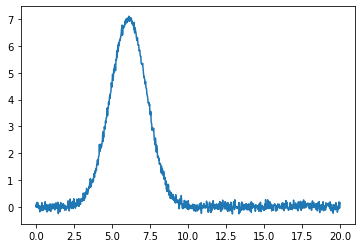

In [3]:
np.random.seed(42)
x = np.linspace(0, 20.0, 1001)

data = (gaussian(x, 21, 6.1, 1.2) + np.random.normal(scale=0.1, size=x.size))  # normal distr. with some noise
plt.plot(x, data);

In [22]:
def f(x, a, b, c):
    return gaussian(x, a, b, c)

In [23]:
mod = lmfit.Model(f)
# we set the parameters (and some initial parameter guesses)
mod.set_param_hint("a", value=10.0, vary=True)
mod.set_param_hint("b", value=10.0, vary=True)
mod.set_param_hint("c", value=10.0, vary=True)

params = mod.make_params()

In [24]:
result = mod.fit(data, params, method="leastsq", x=x) 

{'a': 21.03260705312548, 'b': 6.100343154231026, 'c': 1.2009255088579456}

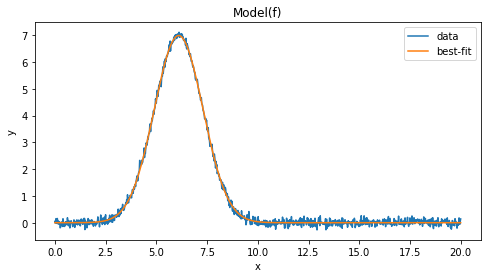

In [25]:
plt.figure(figsize=(8,4))
result.plot_fit(datafmt="-");
result.best_values

## Result

In [26]:
result